In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("data/income_spending.xlsx")

print(df.shape)
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income(k$),Spending Score(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 데이터 탐색

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             200 non-null    int64 
 1   Gender                 200 non-null    object
 2   Age                    200 non-null    int64 
 3   Annual Income(k$)      200 non-null    int64 
 4   Spending Score(1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# 결측치는 없음.

In [5]:
# 기술통계량 
df[ ['Age',	'Annual Income(k$)', 'Spending Score(1-100)'] ].describe()

,Age,Annual Income(k$),Spending Score(1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# Kmeans 준비

In [6]:
# 1. 원핫인코딩
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True, dtype='int')
df_encoded

,CustomerID,Age,Annual Income(k$),Spending Score(1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


In [7]:
# 2. ID 제거
X = df_encoded.drop(columns=['CustomerID'])
X

,Age,Annual Income(k$),Spending Score(1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [8]:
# 3. 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

In [9]:
# 4. KMeans
from sklearn.cluster import KMeans
k=5   # 군집의 수
model = KMeans(n_clusters=k, random_state=42)
labels = model.fit_predict(X_scaled)
labels   # labels는 KMeans 결과

array([2, 2, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 0, 4, 0, 2, 4, 2, 0, 4, 2, 2,
       0, 2, 0, 2, 0, 2, 4, 4, 0, 4, 0, 2, 0, 4, 0, 4, 4, 4, 0, 2, 0, 4,
       0, 4, 0, 4, 4, 4, 0, 2, 4, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 2,
       4, 0, 2, 4, 0, 0, 0, 0, 0, 2, 3, 2, 4, 0, 0, 2, 0, 3, 4, 0, 0, 4,
       4, 0, 0, 2, 0, 3, 4, 2, 3, 4, 0, 2, 4, 3, 0, 2, 0, 4, 0, 0, 0, 0,
       0, 4, 3, 2, 4, 4, 0, 3, 3, 3, 2, 3, 3, 2, 3, 3, 1, 2, 1, 2, 1, 2,
       3, 3, 1, 3, 3, 2, 1, 3, 0, 2, 3, 3, 1, 2, 1, 3, 3, 2, 1, 2, 3, 3,
       3, 3, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 2, 1, 2, 1, 2, 3, 3,
       1, 2, 1, 2, 3, 3, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2,
       1, 2], dtype=int32)

In [10]:
# 5. 기존의 데이터에 군집화 결과 합치기
df['cluster'] = labels
df

,CustomerID,Gender,Age,Annual Income(k$),Spending Score(1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,4
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,3
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


# 최적의 k값 구하기

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# -----------------------------
# 최적의 k값 구하기 (Silhouette)
# -----------------------------
k_range = range(2, 21)

results = []
best_k, best_score = None, -1

for k in k_range:
    model = KMeans(
        n_clusters=k,
        random_state=42,
        n_init="auto"   # 에러 나면 n_init=10 으로 바꿔줘
    )
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)

    results.append({"k": k, "silhouette": score})

    if score > best_score:
        best_k, best_score = k, score

results_df = pd.DataFrame(results).sort_values("k")
print(results_df)
print(f"\n✅ Best k = {best_k}, silhouette = {best_score:.4f}")

     k  silhouette
0    2    0.277604
1    3    0.257620
2    4    0.290109
3    5    0.271910
4    6    0.334754
5    7    0.345740
6    8    0.372765
7    9    0.387615
8   10    0.420764
9   11    0.427507
10  12    0.425701
11  13    0.423994
12  14    0.412818
13  15    0.415986
14  16    0.429421
15  17    0.430504
16  18    0.434484
17  19    0.431736
18  20    0.426164

✅ Best k = 18, silhouette = 0.4345


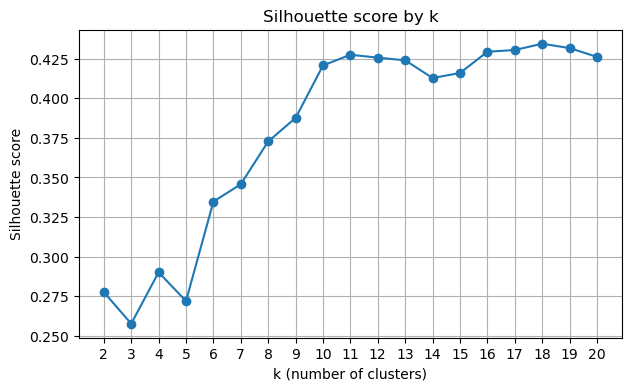

In [12]:
# 실루엣 스코어 시각화 => k값은 5로 결정. 
plt.figure(figsize=(7,4))
plt.plot(results_df["k"], results_df["silhouette"], marker="o")
plt.xticks(list(k_range))
plt.xlabel("k (number of clusters)")
plt.ylabel("Silhouette score")
plt.title("Silhouette score by k")
plt.grid(True)
plt.show()

# 최종 그룹화 및 마케팅 인사이트 도출

In [13]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")  # 에러 나면 n_init=10
labels = kmeans.fit_predict(X_scaled)

# 원본 df에 군집 결과 붙이기
df_clustered = df.copy()
df_clustered["cluster"] = labels
df_clustered

,CustomerID,Gender,Age,Annual Income(k$),Spending Score(1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,4
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,3
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


In [14]:
# 군집별 요약(이걸 보고 네이밍/해석)
cluster_profile = (
    df_clustered.groupby("cluster")[["Age", "Annual Income(k$)", "Spending Score(1-100)"]]
    .mean()
    .round(2)
    .sort_values(["Annual Income(k$)", "Spending Score(1-100)"], ascending=[False, False])
)
print("=== Cluster Profile (Mean) ===")
cluster_profile

=== Cluster Profile (Mean) ===


,Age,Annual Income(k$),Spending Score(1-100)
cluster,,,
3,33.21,91.03,72.14
1,39.00,88.33,14.43
2,28.41,58.23,70.72
5,49.91,54.26,36.53
0,57.21,46.79,38.71
4,25.89,41.28,57.94


In [15]:
# (참고) 자동 네이밍: 군집별 평균을 바탕으로 규칙 기반으로 이름 생성
# - Income/Spending을 전체 분포 기준 상/중/하로 구분
inc_q1, inc_q2 = df_clustered["Annual Income(k$)"].quantile([0.33, 0.66]).tolist()
sp_q1, sp_q2   = df_clustered["Spending Score(1-100)"].quantile([0.33, 0.66]).tolist()
age_q2 = df_clustered["Age"].quantile(0.5)

def level(x, q1, q2):
    if x <= q1: return "Low"
    if x <= q2: return "Mid"
    return "High"

name_map = {}
for c, row in cluster_profile.iterrows():
    inc_lv = level(row["Annual Income(k$)"], inc_q1, inc_q2)
    sp_lv  = level(row["Spending Score(1-100)"], sp_q1, sp_q2)
    age_lv = "Young" if row["Age"] <= age_q2 else "Mature"

    # 마케팅 친화적 라벨링 규칙(필요하면 너의 기준으로 쉽게 수정 가능)
    if inc_lv == "High" and sp_lv == "High":
        seg = f"VIP Premium ({age_lv})"
    elif inc_lv == "High" and sp_lv in ["Low", "Mid"]:
        seg = f"Affluent Cautious ({age_lv})"   # 고소득/신중형
    elif inc_lv in ["Mid", "Low"] and sp_lv == "High":
        seg = f"Deal-Driven Spender ({age_lv})" # 저/중소득/소비성향
    elif inc_lv == "Low" and sp_lv == "Low":
        seg = f"Low Engagement ({age_lv})"      # 저활성
    elif inc_lv == "Mid" and sp_lv == "Mid":
        seg = f"Mainstream ({age_lv})"          # 일반
    else:
        seg = f"Growth Candidate ({age_lv})"    # 애매한 중간/성장 후보

    name_map[c] = seg

df_clustered["cluster_name"] = df_clustered["cluster"].map(name_map)

print("\n=== Cluster Name Map ===")
print(pd.Series(name_map).sort_index())

# # 8) 저장 (CSV / Excel 둘 다)
# df_clustered.to_csv("/mnt/data/income_spending_clustered_k6.csv", index=False, encoding="utf-8-sig")
# df_clustered.to_excel("/mnt/data/income_spending_clustered_k6.xlsx", index=False)


=== Cluster Name Map ===
0        Low Engagement (Mature)
1     Affluent Cautious (Mature)
2    Deal-Driven Spender (Young)
3            VIP Premium (Young)
4       Growth Candidate (Young)
5      Growth Candidate (Mature)
dtype: object


In [16]:
# readme.md

# 📊 군집별 마케팅 액션 플랜 (k=6 운영 기준)

---

## 1️⃣ VIP Premium 고객  
**(고소득 · 고지출 고객)**

### 🎯 목표  
- 객단가(ARPU) 극대화  
- VIP 이탈 방지  
- 브랜드 충성도 강화  

### 🚀 실행 전략  
- VIP 멤버십 등급제 운영  
- 한정판/선출시 제품 제공  
- VIP 전용 이벤트 및 프라이빗 초청  
- 고가 상품 Upsell 전략  

### 📈 핵심 KPI  
- VIP 유지율  
- 평균 구매 금액  
- 재구매 주기  
- 상위 등급 전환율  

---

## 2️⃣ Affluent Cautious 고객  
**(고소득 · 저지출 = 잠재 VIP)**

### 🎯 목표  
- 소비 잠재력 활성화  
- 프리미엄 상품 전환  

### 🚀 실행 전략  
- 체험형 프로모션  
- "가격"이 아닌 "가치" 중심 메시지  
- 프리미엄 번들 패키지  
- 관심 상품 리타겟팅 광고  

### 📈 핵심 KPI  
- 프리미엄 상품 구매율  
- 업셀 전환율  
- 장바구니 → 구매 전환율  

---

## 3️⃣ Deal-Driven Spender 고객  
**(저/중소득 · 고지출 고객)**

### 🎯 목표  
- 프로모션 기반 단기 매출 극대화  
- 할인 의존도 관리  

### 🚀 실행 전략  
- 쿠폰/타임딜/플래시 세일  
- 포인트 적립 강화  
- SNS 이벤트 및 바이럴 캠페인  
- 트렌드 상품 추천  

### 📈 핵심 KPI  
- 쿠폰 사용 매출  
- 프로모션 ROI  
- 마진율 유지  
- 재구매율  

---

## 4️⃣ Mainstream 고객  
**(중간 소득 · 중간 지출)**

### 🎯 목표  
- 안정적인 매출 기반 유지  
- 크로스셀/리텐션 강화  

### 🚀 실행 전략  
- 시즌 프로모션  
- 개인화 추천 시스템  
- 번들/패키지 상품 제안  
- 장바구니 리마인드 메시지  

### 📈 핵심 KPI  
- 재방문율  
- 교차 구매율  
- 고객 생애가치(LTV)  

---

## 5️⃣ Low Engagement 고객  
**(저소득 · 저지출 고객)**

### 🎯 목표  
- 저비용 재활성화  
- 첫 구매 유도  

### 🚀 실행 전략  
- 복귀 전용 쿠폰 발송  
- SMS/푸시 리마인드  
- 입문용 저가 상품 제안  
- 자동화 CRM 캠페인  

### 📈 핵심 KPI  
- 복귀율  
- 첫 구매 전환율  
- 캠페인 CPA  

---

## 6️⃣ 연령 세분화 그룹 (Young vs Mature)

### 🎯 목표  
- 메시지 및 채널 최적화  
- 세대 맞춤 커뮤니케이션  

### 🚀 실행 전략  

**👤 Young 그룹**
- SNS/숏폼 중심 캠페인  
- 한정판/트렌드 상품 강조  
- 모바일 퍼널 최적화  

**👤 Mature 그룹**
- 이메일/카카오톡 중심 마케팅  
- 신뢰·품질 중심 메시지  
- 보증/리뷰/상담 강조  

### 📈 핵심 KPI  
- 채널별 전환율(CVR)  
- CAC(고객획득비용)  
- 콘텐츠 반응률(CTR)

---

# 🔥 전략 요약

k=6 세그먼트는  
"매출 핵심층 + 성장 잠재층 + 단기 매출층 + 저활성층 + 세대 최적화"  
구조로 운영하는 것이 가장 효과적이다.

In [17]:
df

,CustomerID,Gender,Age,Annual Income(k$),Spending Score(1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,4
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,3
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1
